# Data loading

(100, 1)
(100, 1)


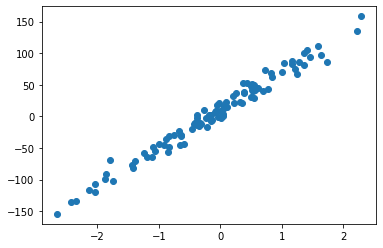

[[-0.87810789]
 [ 1.35963386]] [[-36.35444991]
 [ 81.5433729 ]]


In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
y = np.expand_dims(y, axis=1)

print(X.shape)
print(y.shape)

plt.scatter(X, y)
plt.show()
print(X[:2],y[:2])

# Regression Example by Keras

In [ ]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear'))
optimizer = tf.keras.optimizers.SGD(0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)        


In [14]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

# 모델 평가

In [4]:
test_y[0:4]

array([[ 30.20313981],
       [  9.95338046],
       [-65.01098105],
       [ 42.01483141]])

In [5]:
model.predict(test_x[0:4])


array([[ 40.594887],
       [ -4.975214],
       [-55.086754],
       [ 41.859085]], dtype=float32)

In [6]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 106ms/step - loss: 101.6356 - mse: 101.6356


[101.63558197021484, 101.63558197021484]

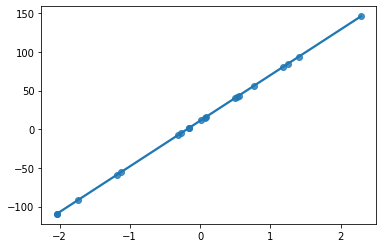

In [7]:
import seaborn as sns
sns.regplot(x=test_x,y=model.predict(test_x),fit_reg=True)


In [ ]:
dir(model)

In [10]:
model.weights.__class__

list

In [11]:
len(model.weights)

2

In [12]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[59.033344]], dtype=float32)>

In [13]:
model.weights[1]

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([10.908117], dtype=float32)>